<a href="https://colab.research.google.com/github/yashverma8111/Car-Selling-Price-Prediction/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


<Axes: xlabel='Year'>

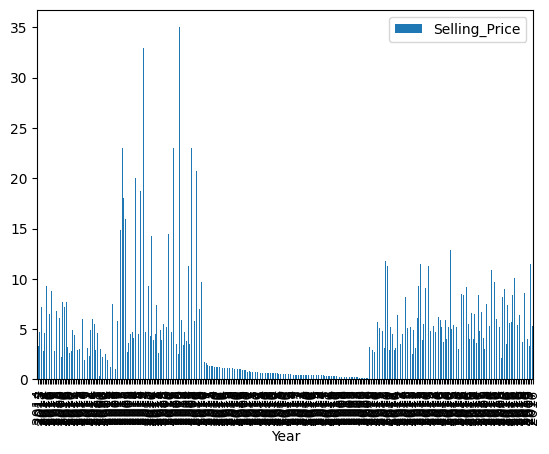

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
values = pd.read_csv('car_data.csv')
print(values.describe())
values.plot(x='Year', y='Selling_Price',kind='bar')

In [ ]:
values.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
values.shape

(301, 9)

In [ ]:
values.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
values.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
values.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
values['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
values['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
values.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
values.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
values.replace({'Fuel_Type':{'Petrol':0,"Diesel":1,"CNG":2}},inplace=True)

In [ ]:
values.replace({'Seller_Type':{'Dealer':0,"Individual":1}},inplace=True)

In [ ]:
values.replace({'Transmission':{'Manual':0,"Automatic":1}},inplace=True)

In [ ]:
print(values)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0   

In [ ]:
X = values.drop(['Car_Name','Selling_Price'],axis = 1)
Y = values['Selling_Price']

In [ ]:
X.shape

(301, 7)

In [ ]:
Y.shape

(301,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [ ]:
lr = LinearRegression()
lr.fit(X_test,Y_test)

LinearRegression()

In [ ]:
testing_data_prediction = lr.predict(X_test)

In [ ]:
testing_error_score = metrics.r2_score(Y_test, testing_data_prediction)
print(testing_error_score)

0.8891056706047124


In [ ]:
print("R Sqared error: {0:.2f} %".format(testing_error_score*100))

R Sqared error: 88.91 %


<function matplotlib.pyplot.show(close=None, block=None)>

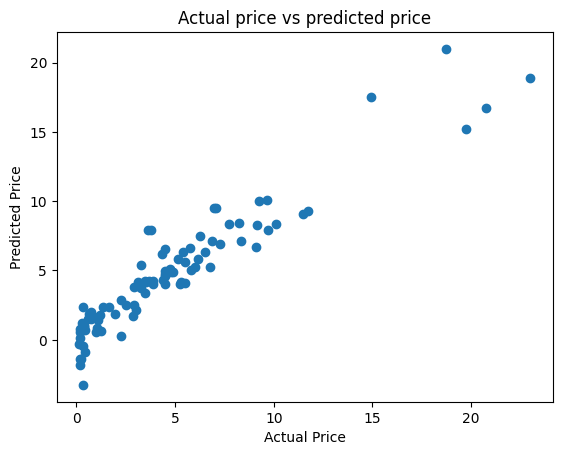

In [ ]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual price vs predicted price")
plt.show